In [68]:
# tensorflow tutorial https://www.tensorflow.org/tutorials/keras/classification

In [69]:
import tensorflow as tf

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
print(tf.__version__)

2.4.1


In [72]:
#load fashion_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [73]:
# shape of training data
train_images.shape

(60000, 28, 28)

In [74]:
train_labels[0]

9

In [75]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

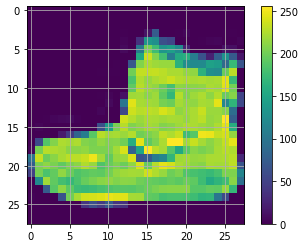

In [76]:
# inspecting the image and pre-processing
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [77]:
# pre-processig starts

In [78]:
# Normalisiing the dataset
train_images = train_images / 255

test_images = test_images / 255

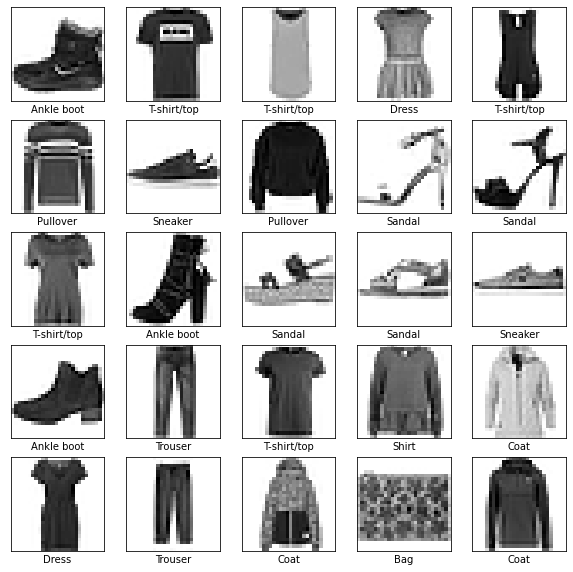

In [79]:
# verify if the data is in correct format
plt.figure(figsize = (10,10))
for i in range (25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i] , cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
                        
                           

In [80]:
# building the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [81]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [82]:
# training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.6273 - accuracy: 0.7820
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3806 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3424 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3092 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2982 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2657 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2546 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2460 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.234

In [83]:
# validation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\ntest loss ',test_loss)
print('\ntest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3359 - accuracy: 0.8812

test loss  0.3359210789203644

test accuracy:  0.8812000155448914


In [84]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model(test_images)

In [85]:
predictions[20]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([6.3740313e-02, 7.7187843e-07, 9.3451929e-01, 3.5822327e-04,
       2.1233593e-04, 3.6947816e-09, 1.1654511e-03, 9.5927372e-12,
       3.4008449e-06, 2.4407058e-08], dtype=float32)>

In [86]:
np.argmax(predictions[0])

9

In [87]:
test_labels[0]

9

In [88]:
# def plot_image(i, predictions_array, true_label, img):
#     true_label, img = true_label[i], img[i]
#     plt.grid(False)
#     plt.xticks([])
#     plt.yticks([])
    
#     plt.imshow(img, cmap=plt.cm.binary)
    
#     predicted_label = np.argmax(predictions_array)
#     if predicted_label == true_label:
#         color = 'blue'
#     else:
#         color = 'red'
        
#     plt.xlabel("{}{0.2f}% ({})".format(class_names[predicted_label], 
#                                        100*np.max(predictions_array),
#                                         class_names[true_label],
#                                         color = color)
               
# def plot_value_array(i, predictions_array, true_label):
#   true_label = true_label[i]
#   plt.grid(False)
#   plt.xticks(range(10))
#   plt.yticks([])
#   thisplot = plt.bar(range(10), predictions_array, color="#777777")
#   plt.ylim([0, 1])
#   predicted_label = np.argmax(predictions_array)

#   thisplot[predicted_label].set_color('red')
#   thisplot[true_label].set_color('blue')
           

In [89]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

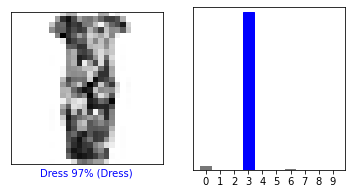

In [90]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

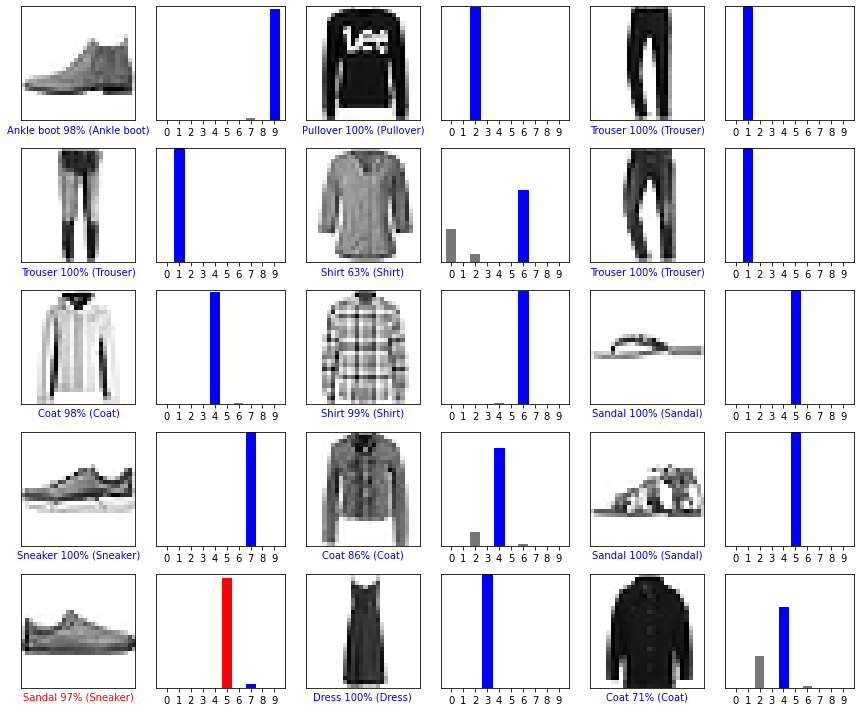

In [91]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [92]:
# use a single data to predict

img = test_images[101]
print(img.shape)

(28, 28)


In [93]:
imgT = np.expand_dims(img, 0)

In [94]:
print(img.shape)

(28, 28)


In [95]:
predictions_single = probability_model.predict(imgT)
print(predictions_single)

[[1.19357435e-06 1.11966603e-10 5.80517401e-04 3.73900002e-06
  1.04100555e-02 4.40245351e-09 9.89004314e-01 1.27543948e-10
  9.93212552e-08 2.17579643e-09]]


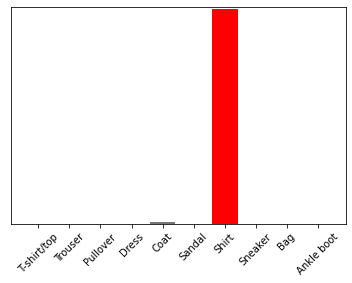

In [96]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [97]:
np.argmax(predictions_single[0])

6

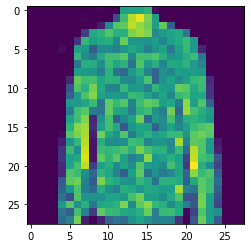

In [98]:
plt.figure()
plt.imshow(img)
plt.show()

In [99]:
print(test_labels[101])

6
